In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## PRESENTATION LAYER
holdings_gold_file_path_v2 = "C:/Users/prashant.tripathi/Code/Upstox/DATA/GOLD/Holdings/Holdings_data_v2.csv"
df_holdings = pd.read_csv(holdings_gold_file_path_v2)

# Convert datetime to date string
df_holdings["date"] = pd.to_datetime(df_holdings["date"])

# Group by the 'date' column and calculate the sum for each date
df_holdings = (
    df_holdings.groupby("date")[["holding_amount", "close_amount"]]
    .sum()
    .reset_index()
)

# setting date column as index
df_holdings = df_holdings.sort_values(by="date").reset_index(drop=True)

df_holdings["pnl_amount"] = (
    df_holdings["close_amount"] - df_holdings["holding_amount"]
)
df_holdings["pnl_percentage"] = (
    df_holdings["pnl_amount"] / df_holdings["holding_amount"]
) * 100

# Calculate the 50-day moving average of 'close_amount'
df_holdings["moving_avg"] = (
    df_holdings["close_amount"].rolling(window=30).mean()
)

df_holdings.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/prashant.tripathi/Code/Upstox/DATA/GOLD/Holdings/Holdings_data_v2.csv'

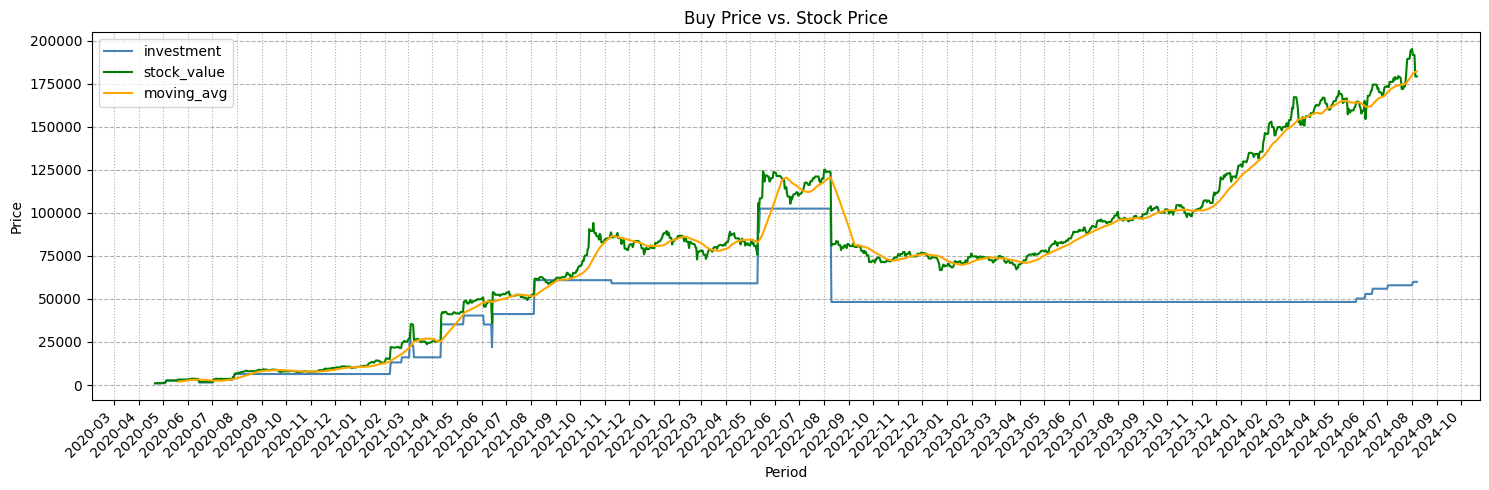

In [ ]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))

# plot individual lines
ax.plot(
    df_holdings["date"],
    df_holdings["holding_amount"],
    label="investment",
    color="steelblue",
)
ax.plot(
    df_holdings["date"],
    df_holdings["close_amount"],
    label="stock_value",
    color="green",
)

ax.plot(
    df_holdings["date"],
    df_holdings["moving_avg"],
    label="moving_avg",
    color="orange",
)

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
plt.title("Buy Price vs. Stock Price")
ax.legend()

# display plot
plt.tight_layout()
plt.show()

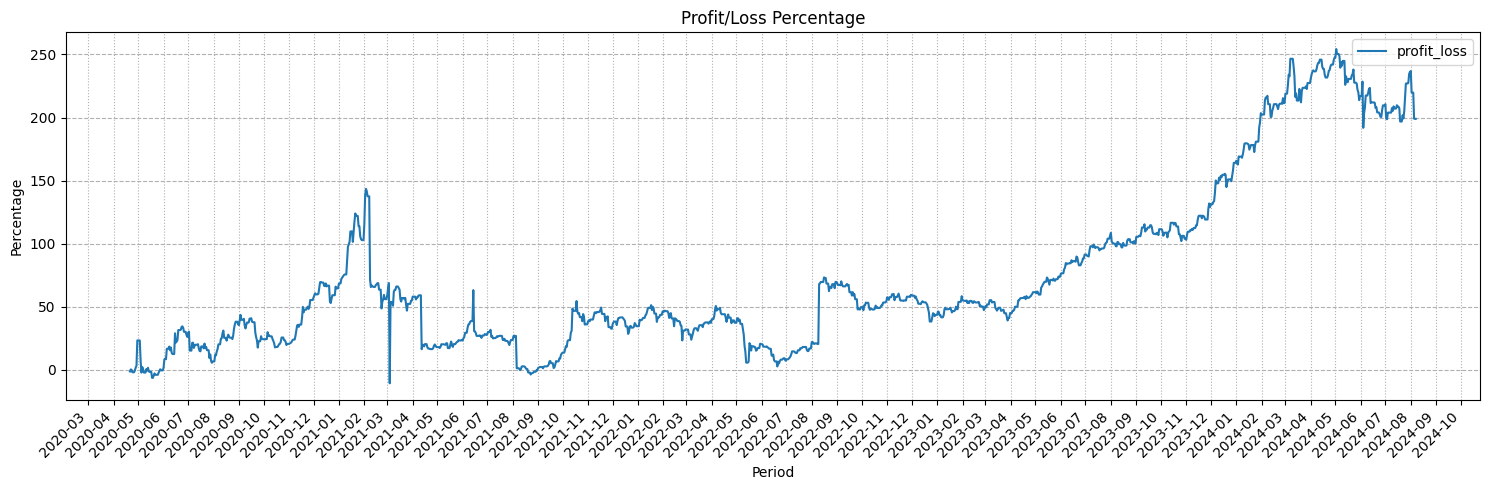

In [ ]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_holdings["date"], df_holdings["pnl_percentage"], label="profit_loss")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss Percentage")
ax.legend()

# display plot
plt.tight_layout()
plt.show()